In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/MyDrive/Eyosi/yolov10')

In [3]:
!nvidia-smi

Thu May 30 15:10:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/.shortcut-targets-by-id/1IMpGSgbtI_WCfYKRXe6dDK16VYJycTFu/Eyosi/yolov10


## Install YOLOv10

In [5]:
!pip install -q supervision

In [6]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [7]:
!git clone https://github.com/SkalskiP/yolov10.git
%cd yolov10
!pip install -r requirements.txt -q

Cloning into 'yolov10'...
remote: Enumerating objects: 20025, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 20025 (delta 71), reused 83 (delta 60), pack-reused 19921
Receiving objects: 100% (20025/20025), 11.17 MiB | 12.40 MiB/s, done.
Resolving deltas: 100% (14050/14050), done.
Updating files: 100% (571/571), done.
/content/drive/.shortcut-targets-by-id/1IMpGSgbtI_WCfYKRXe6dDK16VYJycTFu/Eyosi/yolov10/yolov10


## Download pre-trained weights

In [8]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10l.pt
!ls -lh {HOME}/weights

total 5.2G
-rw------- 1 root root  80M May 23 09:38 yolov10b.pt
-rw------- 1 root root  80M May 23 09:38 yolov10b.pt.1
-rw------- 1 root root  80M May 23 09:38 yolov10b.pt.10
-rw------- 1 root root  80M May 23 09:38 yolov10b.pt.11
-rw------- 1 root root  80M May 23 09:38 yolov10b.pt.12
-rw------- 1 root root  80M May 23 09:38 yolov10b.pt.2
-rw------- 1 root root  80M May 23 09:38 yolov10b.pt.3
-rw------- 1 root root  80M May 23 09:38 yolov10b.pt.4
-rw------- 1 root root  80M May 23 09:38 yolov10b.pt.5
-rw------- 1 root root  80M May 23 09:38 yolov10b.pt.6
-rw------- 1 root root  80M May 23 09:38 yolov10b.pt.7
-rw------- 1 root root  80M May 23 09:38 yolov10b.pt.8
-rw------- 1 root root  80M May 23 09:38 yolov10b.pt.9
-rw------- 1 root root 100M May 23 09:38 yolov10l.pt
-rw------- 1 root root 100M May 23 09:38 yolov10l.pt.1
-rw------- 1 root root 100M May 23 09:38 yolov10l.pt.10
-rw------- 1 root root 100M May 23 09:38 yolov10l.pt.11
-rw------- 1 root root 100M May 23 09:38 yolov10l.pt.

In [8]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="jLmiVw7s8XiPjTF5DKXM")
project = rf.workspace("part2m").project("eyosi")
version = project.version(1)
dataset = version.download("yolov9")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 523.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.1

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to eyosi-1 in yolov9:: 100%|██████████| 11954/11954 [01:38<00:00, 121.30it/s]


In [9]:
dataset.location

'/content/drive/.shortcut-targets-by-id/1IMpGSgbtI_WCfYKRXe6dDK16VYJycTFu/Eyosi/yolov10/eyosi-1'

## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train epochs=500 batch=32 plots=True \
model={HOME}/weights/yolov10n.pt \
data={dataset.location}/data.yaml

/content
New https://pypi.org/project/ultralytics/8.2.24 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Eyosi/yolov10/weights/yolov10n.pt, data=/content/drive/MyDrive/Eyosi/yolov10/eyosi-1/data.yaml, epochs=500, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, a

In [ ]:
%cd $HOME

!yolo task=detect mode=train epochs=500 batch=32 plots=True \
    model=/content/drive/MyDrive/Eyosi/yolov10/runs/detect/train2/weights/last.pt \
    data=/content/drive/MyDrive/Eyosi/yolov10/eyosi-1/data.yaml \
    resume

/content
WARNING ⚠️ argument '--resume' does not require leading dashes '--', updating to 'resume'.
New https://pypi.org/project/ultralytics/8.2.25 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Eyosi/yolov10/runs/detect/train2/weights/last.pt, data=/content/drive/MyDrive/Eyosi/yolov10/eyosi-1/data.yaml, epochs=500, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=

In [ ]:
%cd $HOME

!yolo task=detect mode=train epochs=500 batch=32 plots=True \
    model=/content/drive/MyDrive/Eyosi/yolov10/runs/detect/train2/weights/last.pt \
    data=/content/drive/MyDrive/Eyosi/yolov10/eyosi-1/data.yaml \
    resume

/content
New https://pypi.org/project/ultralytics/8.2.25 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Eyosi/yolov10/runs/detect/train2/weights/last.pt, data=/content/drive/MyDrive/Eyosi/yolov10/eyosi-1/data.yaml, epochs=500, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, vis

In [ ]:
%cd $HOME

!yolo task=detect mode=train epochs=500 batch=32 plots=True \
    model=/content/drive/MyDrive/Eyosi/yolov10/runs/detect/train2/weights/last.pt \
    data=/content/drive/MyDrive/Eyosi/yolov10/eyosi-1/data.yaml \
    resume

/content
New https://pypi.org/project/ultralytics/8.2.25 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Eyosi/yolov10/runs/detect/train2/weights/last.pt, data=/content/drive/MyDrive/Eyosi/yolov10/eyosi-1/data.yaml, epochs=500, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, vis

In [ ]:
%cd $HOME

!yolo task=detect mode=train epochs=500 batch=32 plots=True \
    model=/content/drive/MyDrive/Eyosi/yolov10/runs/detect/train2/weights/last.pt \
    data=/content/drive/MyDrive/Eyosi/yolov10/eyosi-1/data.yaml \
    resume

/content
New https://pypi.org/project/ultralytics/8.2.25 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Eyosi/yolov10/runs/detect/train2/weights/last.pt, data=/content/drive/MyDrive/Eyosi/yolov10/eyosi-1/data.yaml, epochs=500, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, vis

In [10]:
%cd $HOME

!yolo task=detect mode=train epochs=500 batch=32 plots=True \
    model=/content/drive/MyDrive/Eyosi/yolov10/runs/detect/train2/weights/last.pt \
    data=/content/drive/MyDrive/Eyosi/yolov10/eyosi-1/data.yaml \
    resume

/content
New https://pypi.org/project/ultralytics/8.2.26 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Eyosi/yolov10/runs/detect/train2/weights/last.pt, data=/content/drive/MyDrive/Eyosi/yolov10/eyosi-1/data.yaml, epochs=500, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, vis

In [11]:
!ls {HOME}/runs/detect/train2/

args.yaml					     F1_curve.png	     train_batch73500.jpg
confusion_matrix_normalized.png			     labels_correlogram.jpg  train_batch73501.jpg
confusion_matrix.png				     labels.jpg		     train_batch73502.jpg
events.out.tfevents.1716972615.81d5aa4a27a3.13376.0  P_curve.png	     val_batch0_labels.jpg
events.out.tfevents.1716990089.def5de415b94.7029.0   PR_curve.png	     val_batch0_pred.jpg
events.out.tfevents.1717007058.b8d75a244776.1327.0   R_curve.png	     val_batch1_labels.jpg
events.out.tfevents.1717007258.b8d75a244776.3383.0   results.csv	     val_batch1_pred.jpg
events.out.tfevents.1717007578.b8d75a244776.5274.0   results.png	     val_batch2_labels.jpg
events.out.tfevents.1717040675.a6a9007ac2a6.2735.0   train_batch0.jpg	     val_batch2_pred.jpg
events.out.tfevents.1717057918.52f1f4fa9dc9.2148.0   train_batch1.jpg	     weights
events.out.tfevents.1717071887.21c5685a231d.3327.0   train_batch2.jpg


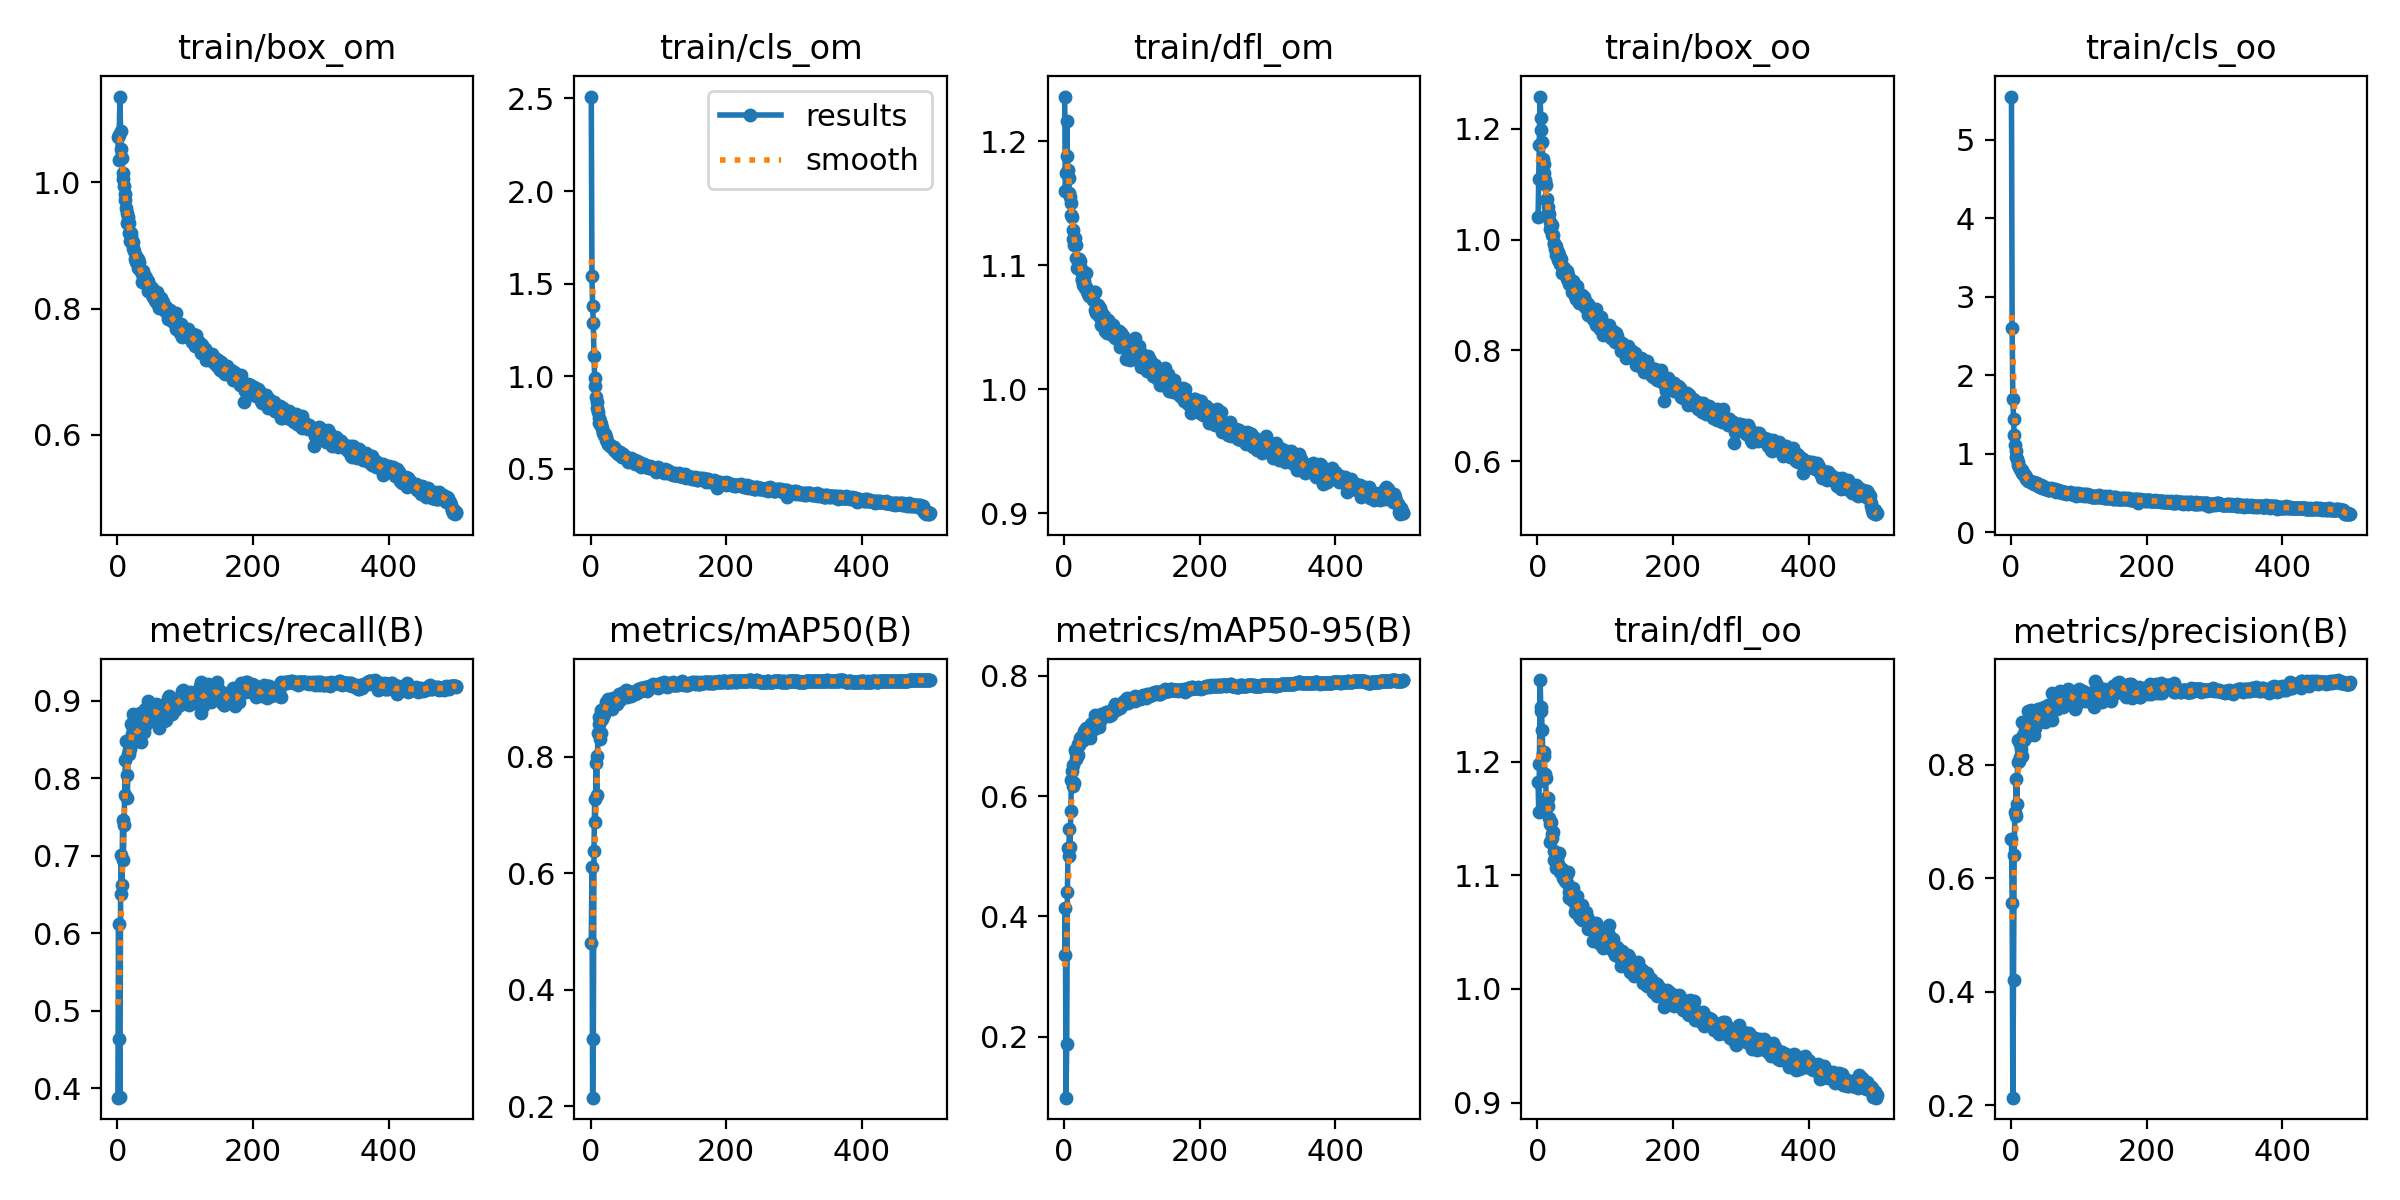

In [15]:
from IPython.display import Image

Image(filename="/content/drive/MyDrive/Eyosi/yolov10/runs/detect/train2/results.png", width=1000)

/content


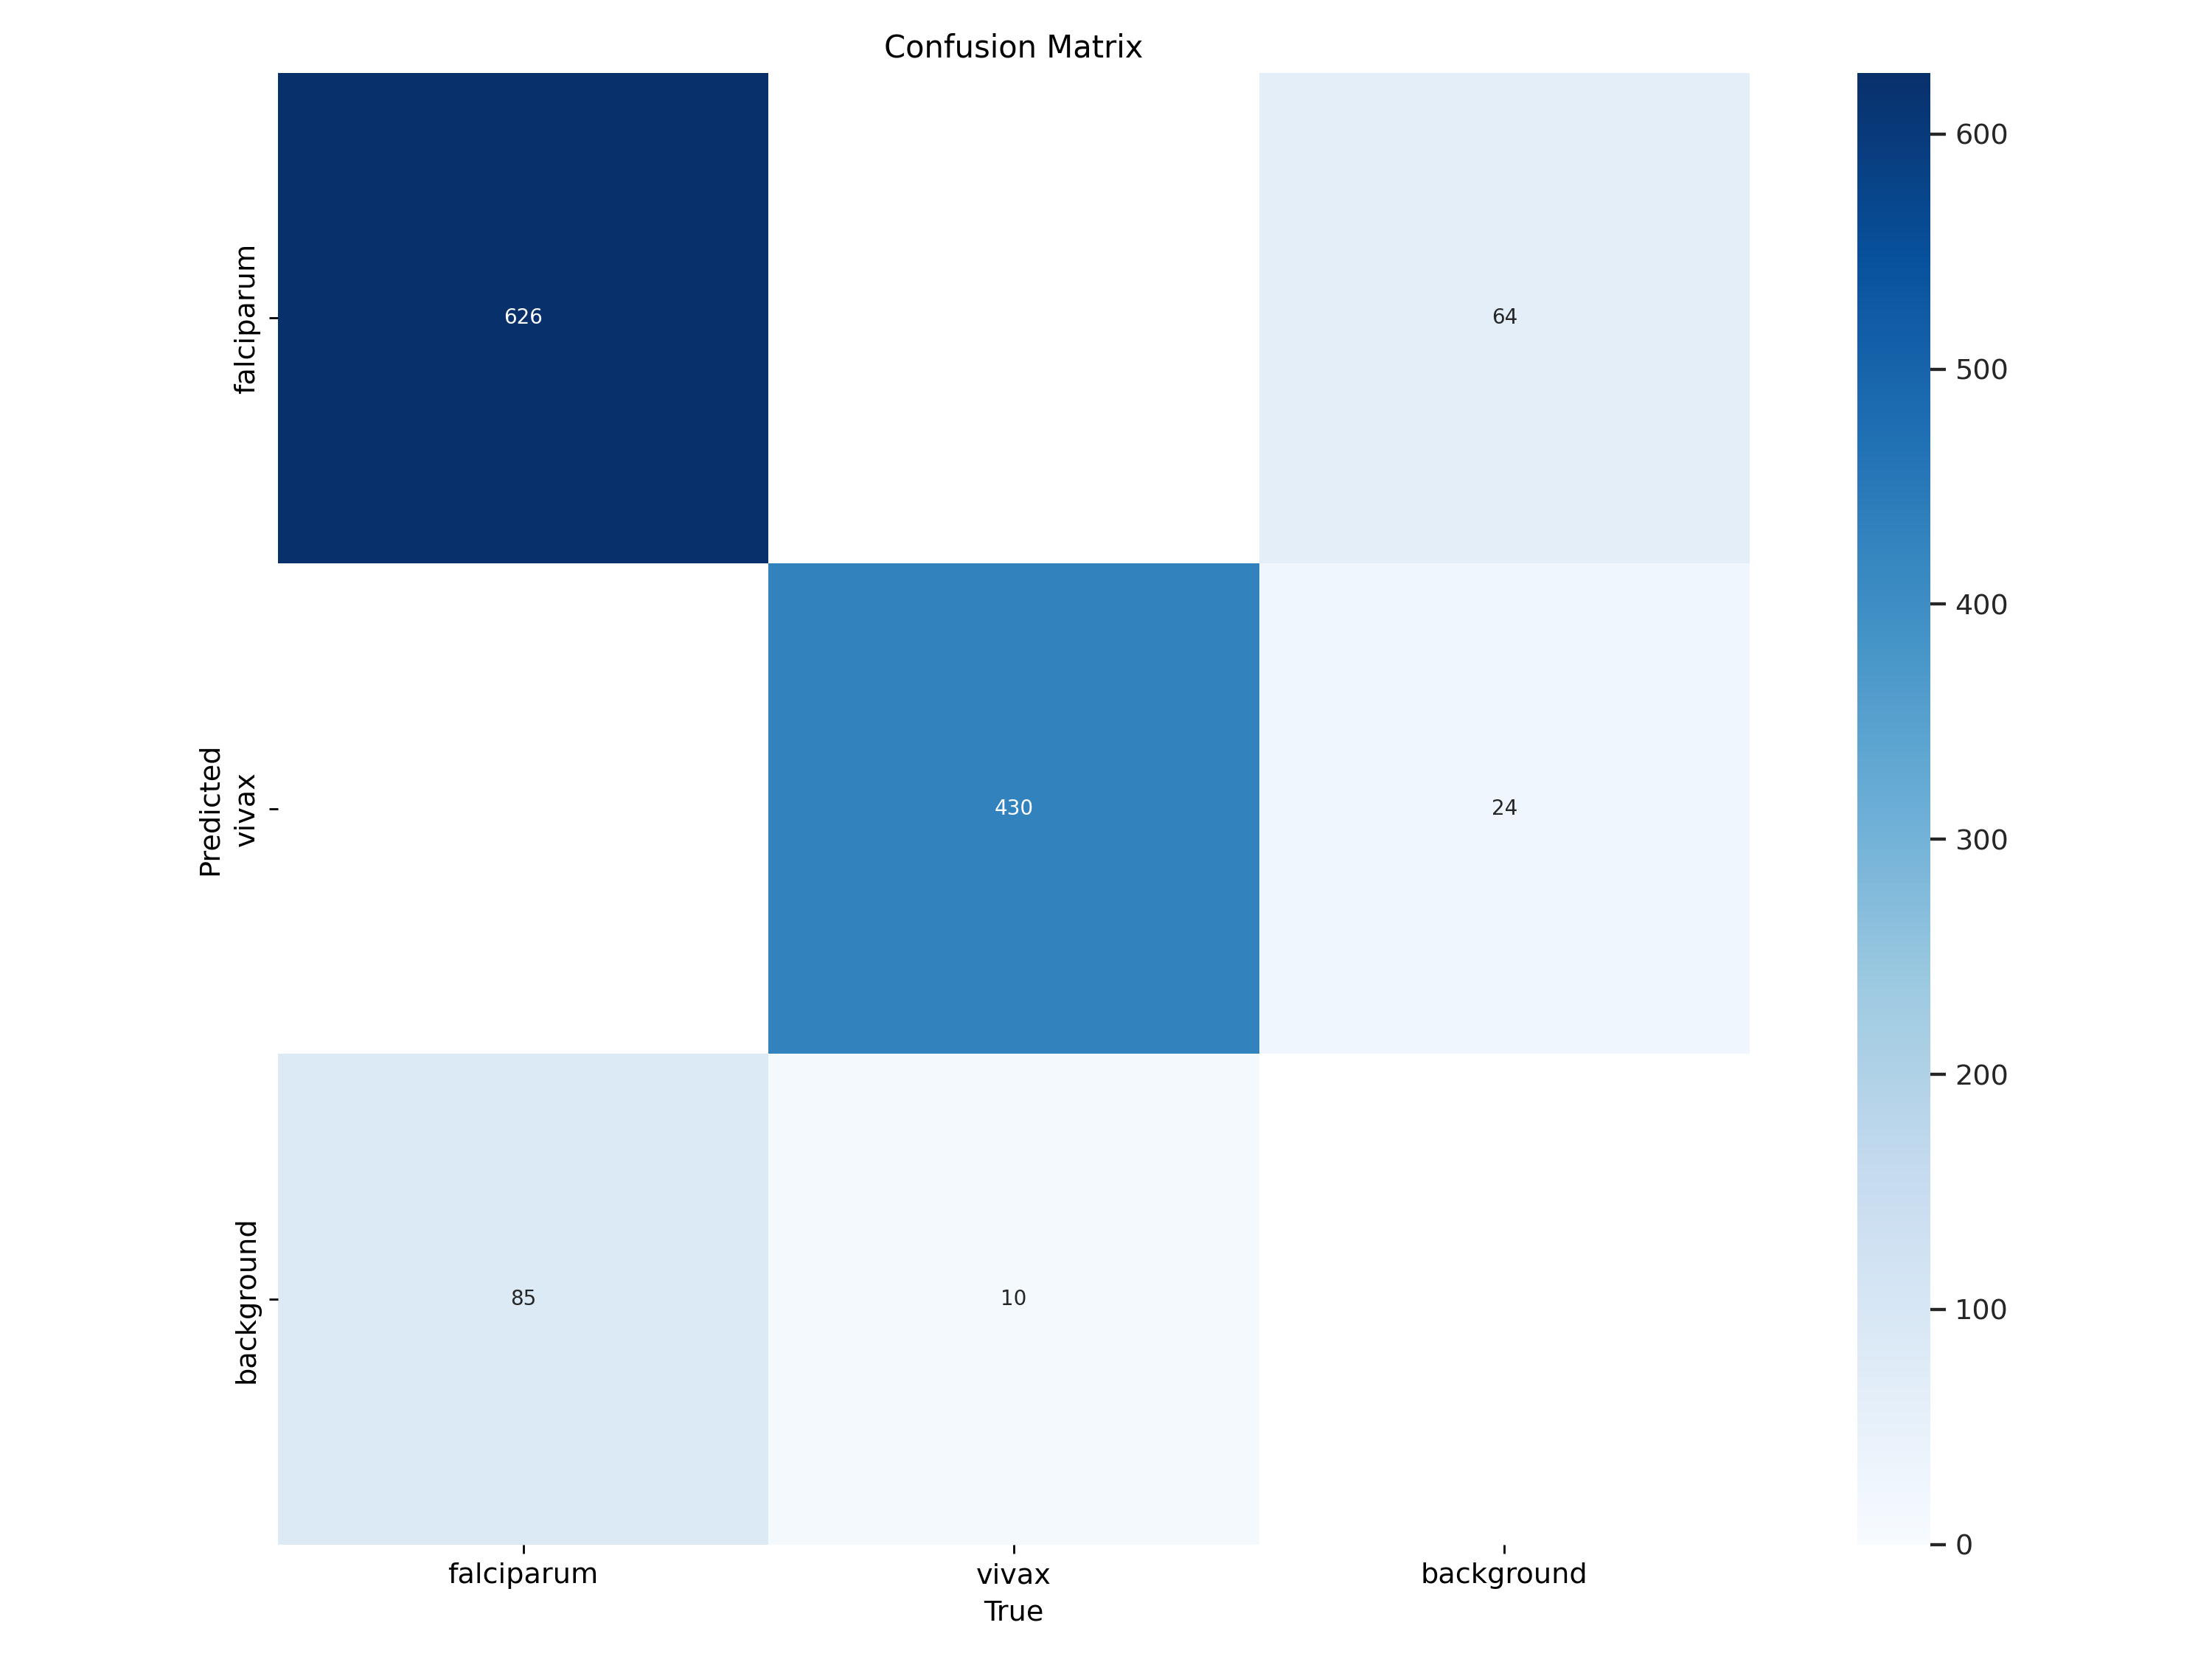

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

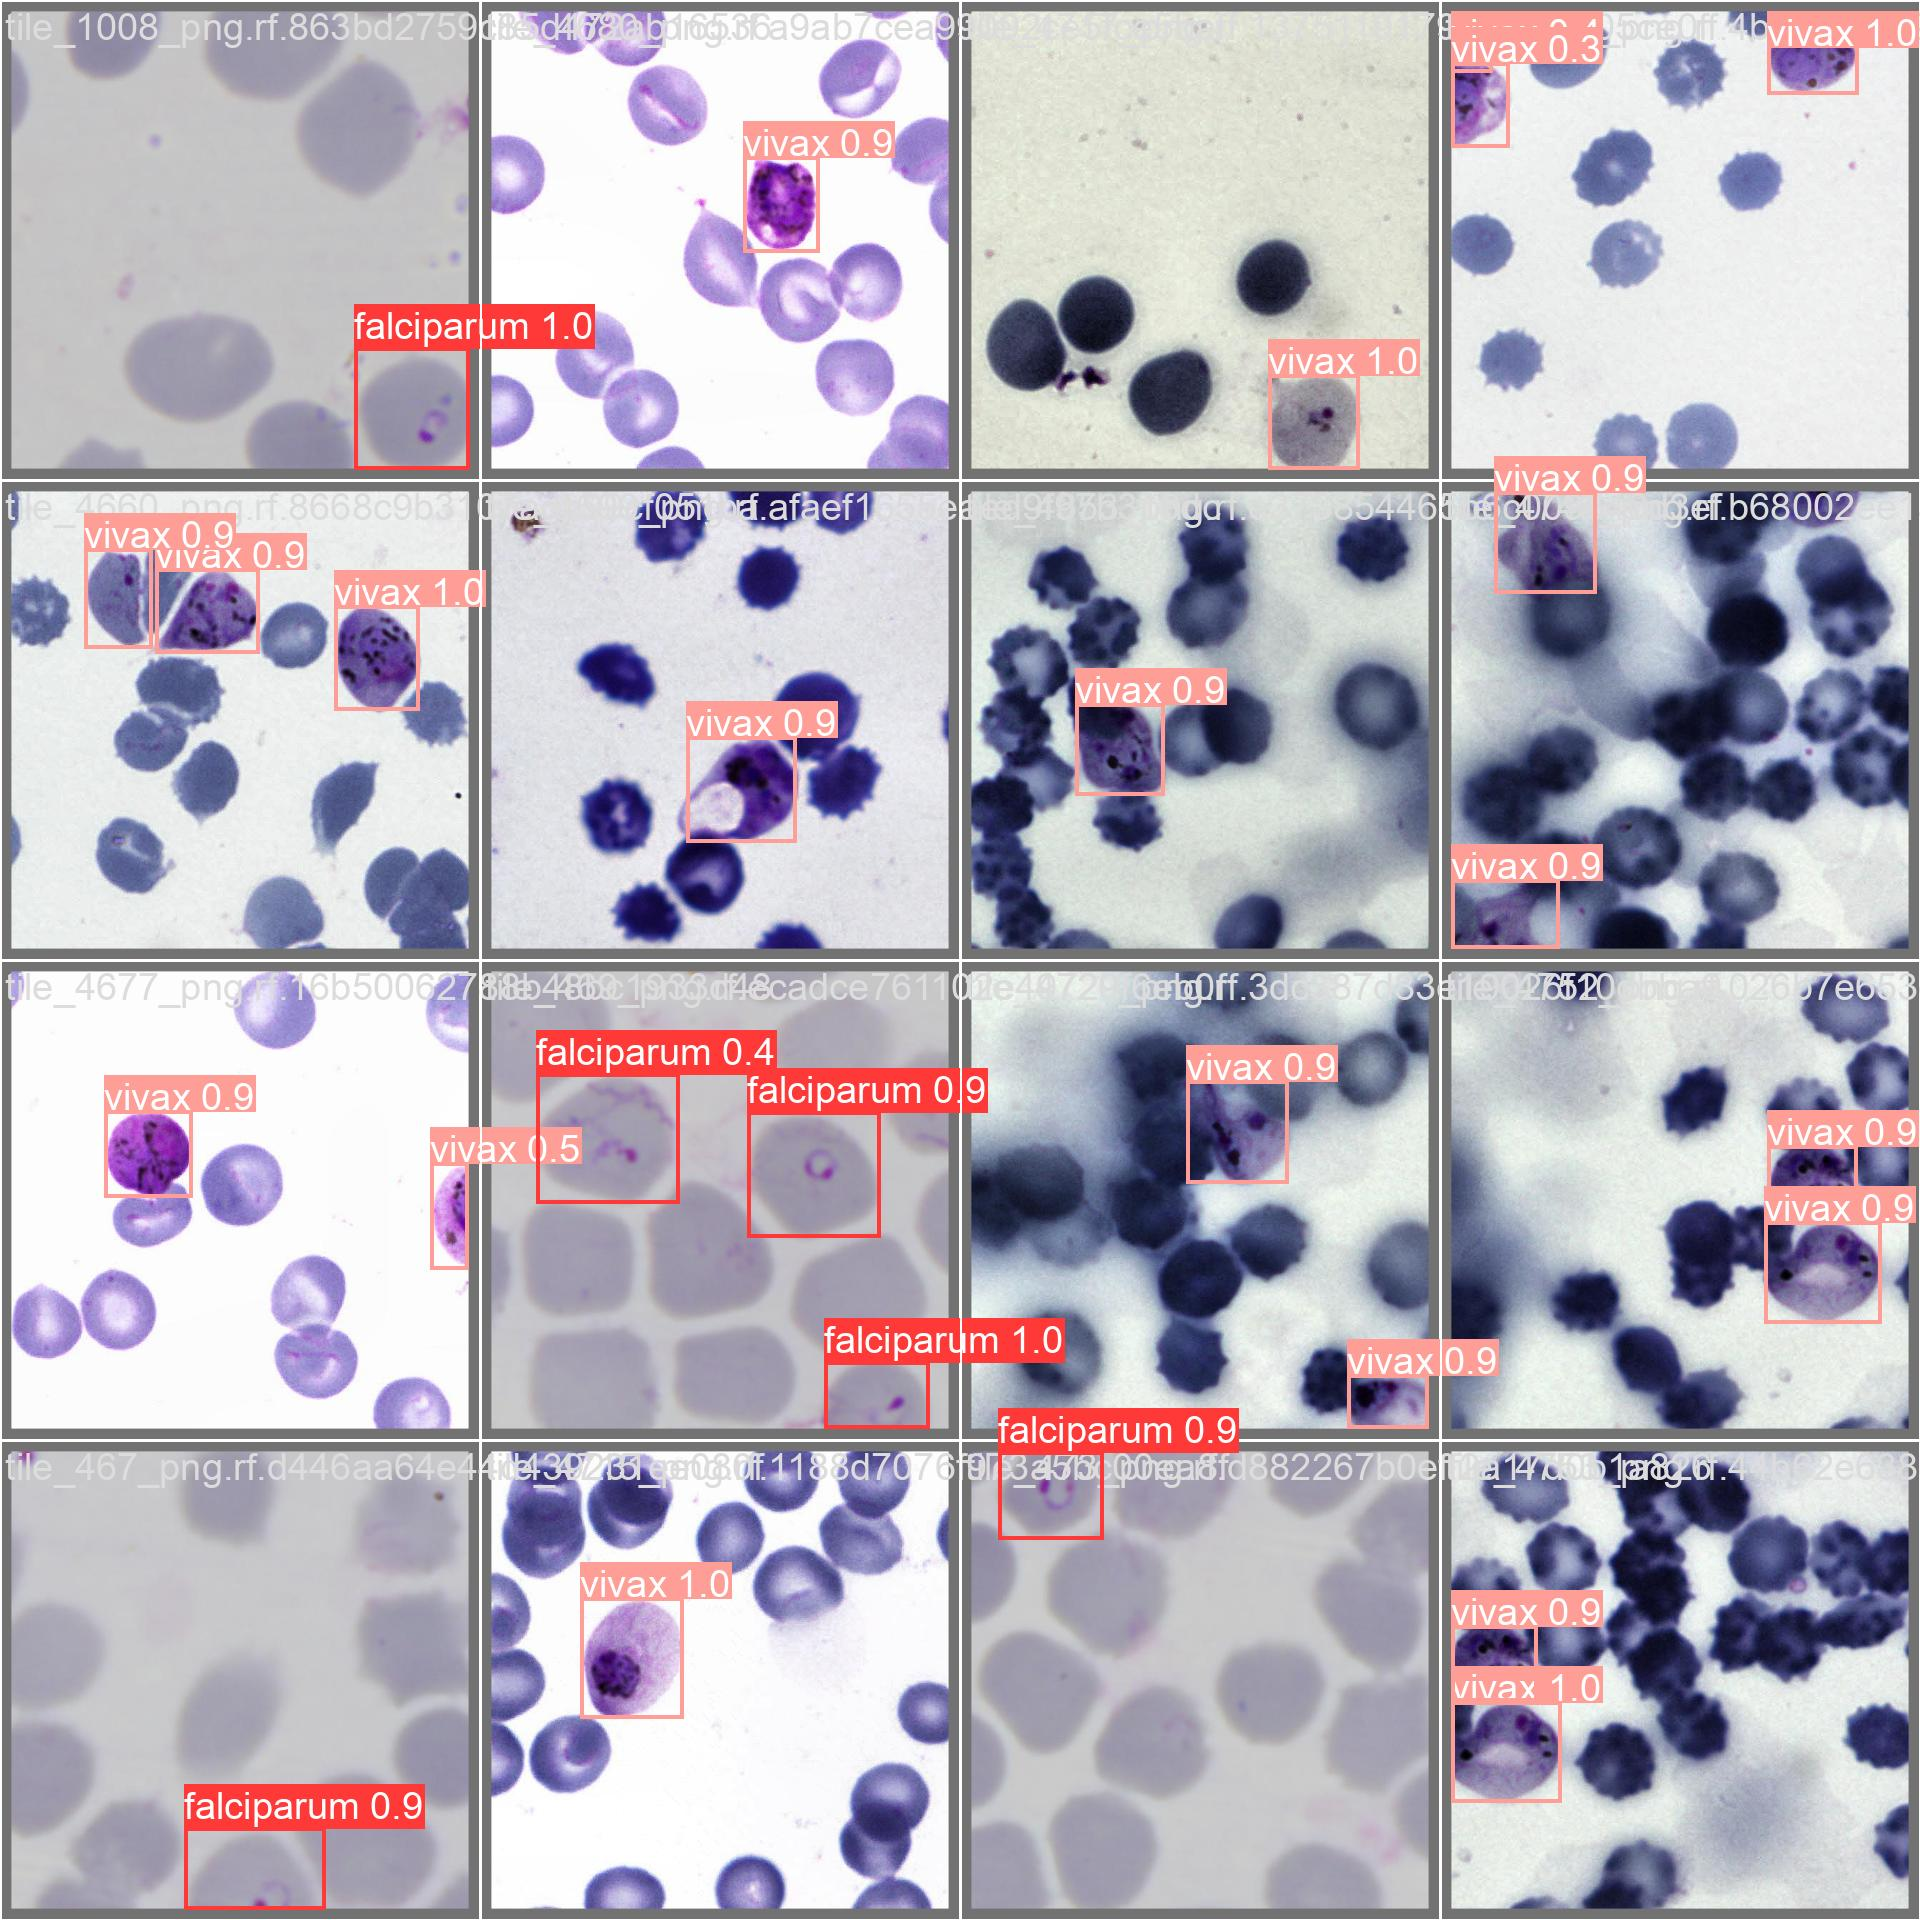

In [19]:
from IPython.display import Image

Image(filename=f"{HOME}/runs/detect/train2/val_batch0_pred.jpg", width=1000)

In [17]:
!yolo val model=/content/drive/MyDrive/Eyosi/yolov10/runs/detect/train2/weights/best.pt data=/content/drive/MyDrive/Eyosi/yolov10/eyosi-1/data.yaml batch=32


Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2695196 parameters, 0 gradients, 8.2 GFLOPs
val: Scanning /content/drive/.shortcut-targets-by-id/1IMpGSgbtI_WCfYKRXe6dDK16VYJycTFu/Eyosi/yolov10/eyosi-1/valid/labels.cache... 716 images, 0 backgrounds, 0 corrupt: 100% 716/716 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 23/23 [00:20<00:00,  1.11it/s]
                   all        716       1151      0.947      0.918      0.931      0.793
            falciparum        716        711      0.925      0.866      0.879      0.724
                 vivax        716        440      0.968      0.969      0.983      0.863
Speed: 1.9ms preprocess, 5.3ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/val5
💡 Learn more at https://docs.ultralytics.com/modes/val


In [9]:
!yolo task=detect mode=predict conf=0.25 save=True model=/content/drive/MyDrive/Eyosi/yolov10/runs/detect/train2/weights/best.pt source=/content/drive/MyDrive/Eyosi/yolov10/eyosi-1/test/images/tile_1000_png.rf.d700e8ea2af04430403a59c96d3c6c53.jpg


Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2695196 parameters, 0 gradients, 8.2 GFLOPs

image 1/1 /content/drive/MyDrive/Eyosi/yolov10/eyosi-1/test/images/tile_1000_png.rf.d700e8ea2af04430403a59c96d3c6c53.jpg: 640x640 2 falciparums, 28.6ms
Speed: 3.4ms preprocess, 28.6ms inference, 12.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [10]:
!yolo task=detect mode=predict conf=0.25 save=True model=/content/drive/MyDrive/Eyosi/yolov10/runs/detect/train2/weights/best.pt source=/content/drive/MyDrive/Eyosi/yolov10/eyosi-1/test/images/


Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2695196 parameters, 0 gradients, 8.2 GFLOPs

image 1/478 /content/drive/MyDrive/Eyosi/yolov10/eyosi-1/test/images/tile_1000_png.rf.d700e8ea2af04430403a59c96d3c6c53.jpg: 640x640 2 falciparums, 19.3ms
image 2/478 /content/drive/MyDrive/Eyosi/yolov10/eyosi-1/test/images/tile_1027_png.rf.80856a0db346df3ac2efc066372c0ef0.jpg: 640x640 2 falciparums, 16.9ms
image 3/478 /content/drive/MyDrive/Eyosi/yolov10/eyosi-1/test/images/tile_1031_png.rf.223fe4f71d7bdcdadc48f7e248a8b190.jpg: 640x640 1 falciparum, 9.7ms
image 4/478 /content/drive/MyDrive/Eyosi/yolov10/eyosi-1/test/images/tile_1047_png.rf.a8e044e8ddd9778f1a3156dd43b4fa2a.jpg: 640x640 1 falciparum, 9.6ms
image 5/478 /content/drive/MyDrive/Eyosi/yolov10/eyosi-1/test/images/tile_104_png.rf.9bb92c33bb7217dae86a2e4d4faf7729.jpg: 640x640 1 falciparum, 28.3ms
image 6/478 /content/drive/MyDrive/Eyosi/yolov10/eyosi-1/test/imag

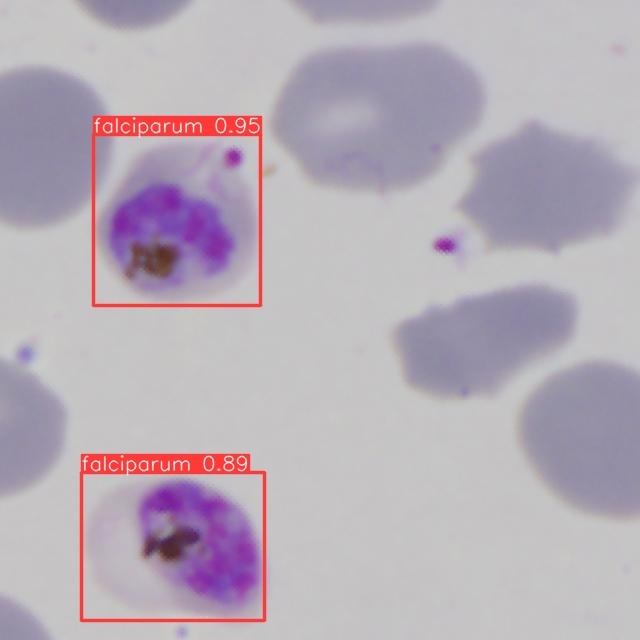

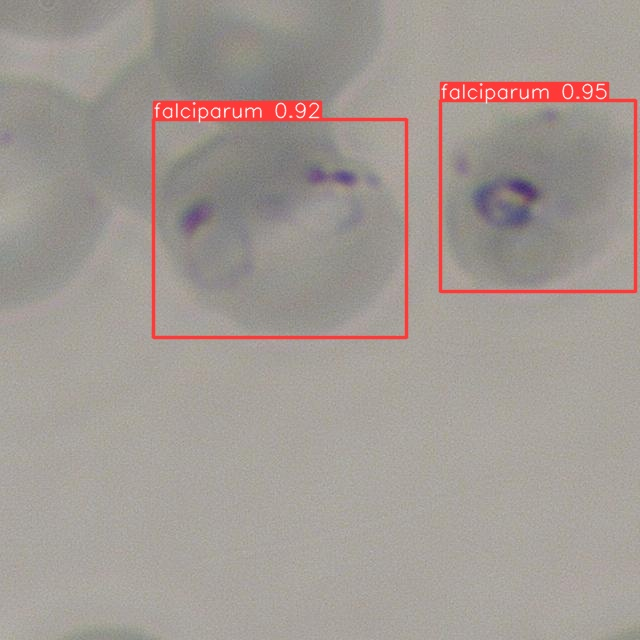

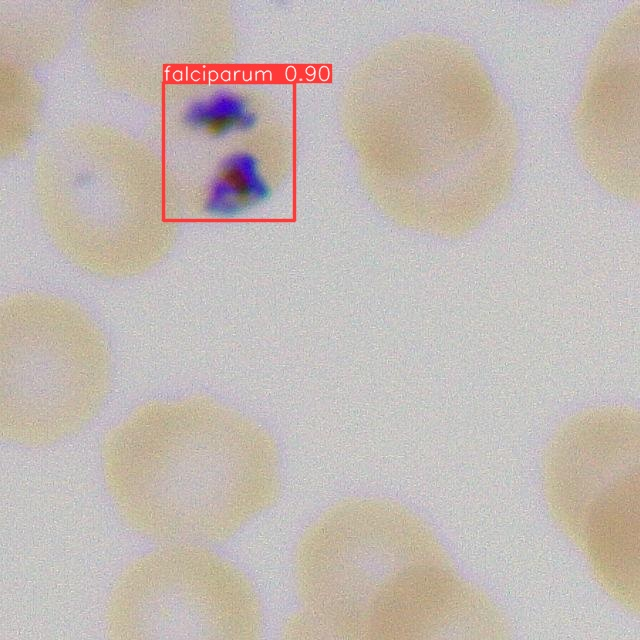

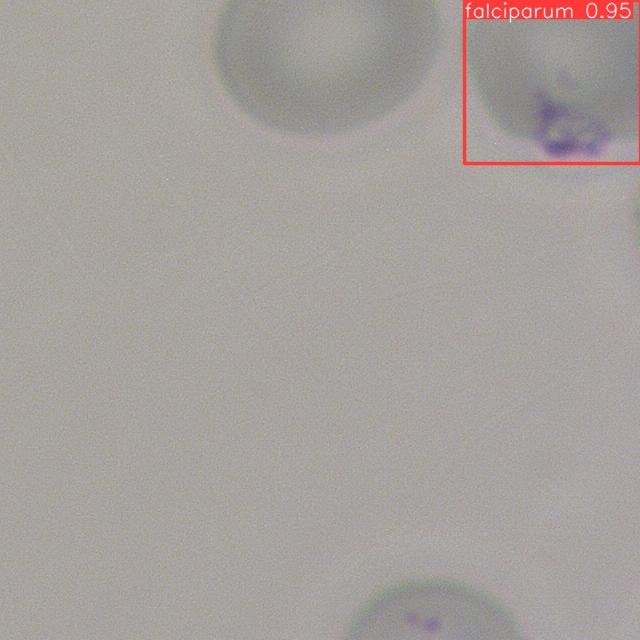

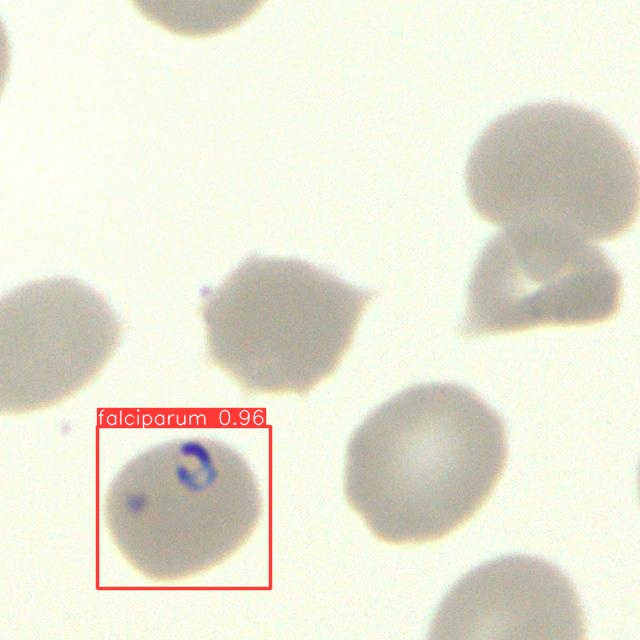

In [12]:
import glob

from IPython.display import Image, display

for image_path in glob.glob('/content/drive/MyDrive/Eyosi/yolov10/yolov10/runs/detect/predict2/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))